# Everything Counts Assessment 1



**This data was collected by myself in May 2024 via google forms.**

# About the data set

This dataset was collected as part of my final-year dissertation project titled "Just Say No! Musicians and Burnout" for my Music Performance degree at the University of West London. My research focused on the challenges professional musicians face in managing workloads, particularly the difficulty of saying "no" to work, and how this can lead to burnout.

I created an online survey with google forms, which I shared on LinkedIn and Facebook to gather responses from professional musicians across all genres. The survey collected information about musicians' demographics, work patterns, ensemble involvement, career opportunities and experiences with burnout. While I originally intended to use this dataset for my dissertation, I ultimately lacked the ability to analyse the data fully and chose not to include it in my final project.

# Analytical Goals and Methods

This notebook aims to provide a comprehensive analysis of a dataset focused on professional musicians and the challenges they face in managing workloads, leading to burnout*. The dataset explores key variables that were academically explored in my dissertation. To achieve this goal, the analysis exploys startistical methods to measure central tendencies (mean, median and mode) and explore distriputions, to ensure a well-rounded exploration of the dataset's featires and support a meaningful conclusion.

Python libaries such as Pandas, Matplotlib and Seaborn were utilised for data processing, visualisation and interpretation. Each visualsation and summy statistic is to highlight the dataste's most relevant features, offering insights into what can cause burnout.

*Burnout – A syndrome of emotional and physical exhaustion, devaluation, and reduced sense of
accomplishment. (Raedeke and Smith, 2001)

Raedeke, T.D. and Smith, A.L. (2001) 'Development and preliminary validation of an athlete
burnout measure', Journal of sport and exercise psychology, 23(4), pp. 281-306.

# Dataset Bias and limitations

The dataset used in this analysis was collected through an online survey targeting only professional musicians. While the dataset provides valuable insights into musicians' experience, there are serveral limitations and potential biases that should be acknowledged.

**Sample size**
The Sample size is relatively small and may not be representative of the broader population of professional musicians; This limitation reduces the generalisability of the findings. 

**Self-reported data**
The potential for inaccuracies from participants due to memory bias, social desirbility or misinterpretation of the survey questions.

**Cultural and Geographic Bias**
The dataset predominantly represents musicians from the UK, which limits the ability to draw conclusions that are universally applicable to musiciand either just in the UK or wolrdwide.




# The dataset contains the following fields:

- **User ID (1)**  
  A unique number for each participant.

- **Pro_musician (2)**  
  Confirmation that participant is a professional musician (defined as performing paid work at least once a month on average).

- **Country (3)**  
  The country where the musician primarily works.

- **Income (4)**  
  Annual income from music performance work, grouped into ranges.

- **Age (5)**  
  Age of the participant, grouped into ranges.

- **Gender (6)**  
  The gender with which the respondent identifies (Male, Female, Non-binary).

- **Work_type (7)**  
  The primary type of work the musician performs (e.g., freelance, salaried).

- **Ensemble_type (8)**  
  The primary type of ensemble the musician performs with (e.g., orchestral, contemporary).

- **New_ensemble_freq (9)**  
  How often the respondent performs with new or different ensembles.

- **Experience_burnout (10)**  
  Indicates whether the musician has experienced burnout, defined as "a syndrome of emotional and physical exhaustion, devaluation, and reduced sense of accomplishment" (Raedke and Smith, 2001).

- **Burnout_Freq (11)**  
  How often the musician experiences burnout and is unable to work.

- **Say_No_To_Jobs (12)**  
  How often the musician declines work opportunities despite being physically available.

- **Career_Opp (13)**  
  How often the musician accepts work to avoid missing out on "career-defining" opportunities.

- **Perfectionist (14)**  
  If the participant identifies as a perfectionist.

- **Conservatoire (15)**  
  Indicates whether the musician studied music performance at a conservatoire.

- **Non_conservatoire (16)**  
  Indicates whether the musician studied a music-related course at a non-conservatoire institution.
  

**Import libaries and the dataset**


In [1]:
import pandas as pd
!pip install pingouin
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

mb = pd.read_csv('Musician_burnout_questionaire.csv')

In [2]:
# Show all columns and see if there is any gaps in the data
print(mb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           0 non-null      float64
 1   User ID              49 non-null     int64  
 2   Pro_musician         49 non-null     object 
 3   Country              49 non-null     object 
 4   Income               47 non-null     object 
 5   Age                  49 non-null     object 
 6   Gender               49 non-null     object 
 7   Work_type            49 non-null     object 
 8   Ensemble_type        49 non-null     object 
 9   New_ensemble_freq    49 non-null     object 
 10  Experienced_burnout  49 non-null     object 
 11  Burnout_Freq         49 non-null     object 
 12  Say_No_To_Jobs       49 non-null     object 
 13  Career_Opp           49 non-null     object 
 14  Why_say_no           49 non-null     object 
 15  Perfectionist        49 non-null     objec

# Clean the data

In [3]:
# Drop column 0 as it is empty 
mb = mb.drop(columns=["Unnamed: 0"], errors="ignore")

# handle missing values in the income column
mb["Income"] = mb["Income"].fillna("0")

**Handling of missing data**

Missing values in the Income column were replaced with 0, under the assumption that participants who did not provide information opted not to disclose or earned minimal income from music. While this approach allowed for numerical consistency, it may have introduced bias by underestimating the actual earnings of some respondents.

In [4]:
# Ensure only data is of professional musicians as this was the requirement of the survay.
# Remove rows where Pro_musician answer is 'No' 

mb = mb[mb['Pro_musician'].str.lower() == 'yes']

# Convert data into numerical values and shorter answers

Columns User ID (1), Pro_musician (2) and Country (3) don't need converting.

**Income (4)**

In [5]:
# Print Income (4) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb['Income'] = mb['Income'].str.strip().str.lower()

# Display unique responses in Income (4)
Income = mb["Income"].unique()
print("Unique Income Responses:")
print(Income)

Unique Income Responses:
['£40,001 - £45,000' '£25,001- £30,000' '£5,001 - £10,000' '< £5,000'
 '£10,001 - £15,000' '£30,001 - £35,000' '0' '£50,001 <'
 '£20,001 - £25,000' '£15,001 - £20,000' '£35,000 - £40,000']


In [6]:
# Replace categorical income ranges with their numeric midpoints
# This ensures that the Income cloumn can be treated as numeric for analysis purposes
mb['Income'] = mb['Income'].replace(
    {
        '0':0,
        '< £5,000':2500,
        '£5,001 - £10,000': 7500,
        '£10,001 - £15,000': 12500,
        '£15,001 - £20,000': 17500,
        '£20,001 - £25,000': 22500,
        '£25,001- £30,000': 27500,
        '£30,001 - £35,000': 32500,
        '£35,000 - £40,000': 37500,
        '£40,001 - £45,000': 42500,
        '£45,001 - £50,000': 47500,
        '£50,001 <' : 52500
        }
)
# Print the counts of each unique income value, in ascending numerical order
print(mb['Income'].value_counts().sort_index())

Income
0         1
2500     12
7500     11
12500     8
17500     1
22500     3
27500     5
32500     1
37500     3
42500     1
52500     2
Name: count, dtype: int64


/tmp/ipykernel_622/729114265.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb['Income'] = mb['Income'].replace(


**Age (5)**

In [7]:
# Print Age (5) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase (incase text is used).
mb['Age'] = mb['Age'].str.strip().str.lower()

# Display unique responses in Age (5)
Age = mb["Age"].unique()
print("Unique Age Responses:")
print(Age)

Unique Age Responses:
['18 - 21' '36 - 40' '22 - 25' '51 - 55' '31 - 35' '46 - 50' '25 - 30'
 '66 - 70' '41 - 45' '61 - 65' '16- 18']


In [8]:
# Replace categorical Age ranges with their numeric midpoints
# This ensures that the Age cloumn can be treated as numeric for analysis purposes
mb['Age'] = mb['Age'].replace(
    {
        '16- 18':17,
        '18 - 21':19.5,
        '22 - 25': 23.5,
        '25 - 30': 27,
        '31 - 35': 32,
        '36 - 40': 37,
        '41 - 45': 43,
        '46 - 50': 48,
        '51 - 55': 53,
        '55 - 60': 57.5,
        '61 - 65': 63,
        '66 - 70': 68
        }
)
# Print the counts of each unique Age value, in ascending numerical order
print(mb['Age'].value_counts().sort_index())

Age
17.0     1
19.5     8
23.5    10
27.0     9
32.0     3
37.0     3
43.0     5
48.0     1
53.0     4
63.0     2
68.0     2
Name: count, dtype: int64


/tmp/ipykernel_622/1491922991.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb['Age'] = mb['Age'].replace(


**Gender(6)**

In [9]:
# Print Gender (6) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb['Gender'] = mb['Gender'].str.strip().str.lower()

# Display unique responses in Gender (6)
unique_Gender = mb["Gender"].unique()
print("Unique Gender Responses:")
print(unique_Gender)

Unique Gender Responses:
['male' 'female' 'non-binary']


In [10]:
# Replace categorical Gender (6) with numbers 
# This ensures that the Gender cloumn can be treated as numeric for analysis purposes
mb['Gender'] = mb['Gender'].replace(['male', 'female', 'non-binary'], [0, 1, 2])

# Print the counts of each unique Gender value, in ascending numerical order
print(mb['Gender'].value_counts().sort_index())

Gender
0    29
1    18
2     1
Name: count, dtype: int64


/tmp/ipykernel_622/1357987431.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb['Gender'] = mb['Gender'].replace(['male', 'female', 'non-binary'], [0, 1, 2])


**Work_type (7)**

In [11]:
# Print Work_type (7) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb['Work_type'] = mb['Work_type'].str.strip().str.lower()

# Display unique responses in Work_type
unique_work_types = mb["Work_type"].unique()
print("Unique Work_type Responses:")
print(unique_work_types)

Unique Work_type Responses:
['other'
 'freelance musician (regular work in new locations and ensembles) - multiple genres'
 'one permanent role and freelance on the side'
 'freelance musician (regular work in new locations and ensemble)- one genre (over 50% of your work)'
 'music teacher'
 "touring musician (over half of the year in a contract away from 'home')"
 'teaching']


In [12]:
# Standardize and simplify the 'Work_type' column by replacing verbose or inconsistent labels
mb['Work_type'] = mb['Work_type'].replace(
    [
        "freelance musician (regular work in new locations and ensembles) - multiple genres",
        "one permanent role and freelance on the side",
        "freelance musician (regular work in new locations and ensemble)- one genre (over 50% of your work)",
        "music teacher",
        "teaching",
        "touring musician (over half of the year in a contract away from 'home')"
    ],
    [
        "freelance (multiple)",
        "permanent + freelance",
        "freelance (single)",
        "music teacher",
        "music teacher",
        "touring musician"
    ]
)

# Print the counts of each unique Work_type value
print(mb['Work_type'].value_counts())

Work_type
freelance (multiple)     28
freelance (single)       15
music teacher             2
other                     1
permanent + freelance     1
touring musician          1
Name: count, dtype: int64


**Ensemble_type (8)**

In [13]:
# Print Ensemble_type (8) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb["Ensemble_type"] = mb["Ensemble_type"].str.strip().str.lower()

# Display unique responses in Ensemble_type (8)
unique_ensemble_types = mb["Ensemble_type"].unique()
print("Standardized Unique Ensemble_type Responses:")
print(unique_ensemble_types)

Standardized Unique Ensemble_type Responses:
['mix of musical theatre, session work and function work'
 'pop/rock band (incl cover bands)' 'musicial theatre' 'orchestral'
 'church' 'chamber ensemble' 'soloist'
 'most of the above, specializing would limit the amount of work i do'
 'equally: solo for events, chamber orch and quartet, pop stage show'
 'all the above' 'all' 'session work' 'church music, and orchestral'
 'jazz ensemble']


In [14]:
# Standardize and simplify the 'Ensemble_type' column by replacing verbose or inconsistent labels
mb["Ensemble_type"] = mb["Ensemble_type"].replace(
    [
        'mix of musical theatre, session work and function work',
        'pop/rock band (incl cover bands)',
        'musicial theatre',
        'orchestral',
        'church',
        'chamber ensemble',
        'soloist',
        'most of the above, specializing would limit the amount of work i do',
        'equally: solo for events, chamber orch and quartet, pop stage show',
        'all the above',
        'all',
        'session work',
        'church music, and orchestral',
        'jazz ensemble'
    ],
    [
        'generalist',               # Combine broad categories
        'contemporary ensemble',    # Combine pop/rock and jazz
        'musical theatre',           # Specific category
        'orchestral/chamber',       # Combine orchestral and chamber
        'church music',             # Specific to church
        'orchestral/chamber',       # Combine orchestral and chamber
        'soloist',                  # Distinct category
        'generalist',               # Combine broad categories
        'generalist',               # Combine broad categories
        'generalist',               # Combine broad categories
        'generalist',               # Combine broad categories
        'session work',             # Distinct category
        'orchestral/chamber',       # Combine orchestral and chamber
        'contemporary ensemble'     # Combine pop/rock and jazz
    ]
)
# Verify the changes by displaying the frequency of each ensemble type
print("Updated Ensemble_type Value Counts:")
print(mb["Ensemble_type"].value_counts())

Updated Ensemble_type Value Counts:
Ensemble_type
orchestral/chamber       17
musical theatre          16
contemporary ensemble     7
generalist                5
church music              1
soloist                   1
session work              1
Name: count, dtype: int64


**New_ensemble_freq (9) Per year**

In [15]:
# Print New_ensemble_freq (9) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb["New_ensemble_freq"] = mb["New_ensemble_freq"].str.strip().str.lower()
New_ensemble_freq = mb["New_ensemble_freq"].unique()

# Display unique responses in New_ensemble_freq (9)
print("Unique New_ensemble_freq Responses:")
print(New_ensemble_freq)

Unique New_ensemble_freq Responses:
['once a month' 'once every 3 months' 'never' 'once a week' 'once a year'
 'twice a year']


In [16]:
# Standardize and simplify the 'New_ensemble_frew' column by replacing verbose or inconsistent labels
mb["New_ensemble_freq"] = mb["New_ensemble_freq"].replace(
    [
        "once a week",
        "once a month",
        "once every 3 months",
        "twice a year",
        "once a year",
        "never"
    ],
    [
        "52",  # 52 weeks in a year
        "12",  # 12 months in a year
        "4",   # 4 quarters in a year
        "2",   # Twice a year
        "1",   # Once a year
        "0"    # Never
    ]
)

# Verify the changes by displaying the frequency of each ensemble type
mb['New_ensemble_freq'] = pd.to_numeric(mb['New_ensemble_freq'])
print(mb["New_ensemble_freq"].value_counts())

New_ensemble_freq
12    22
4     14
52     7
2      3
0      1
1      1
Name: count, dtype: int64


**Experienced_burnout (10)**

In [17]:
# Print Experienced_burnout (10) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb["Experienced_burnout"] = mb["Experienced_burnout"].str.strip().str.lower()

# Display unique responses in Experienced_burnout (10)
Experienced_burnout = mb["Experienced_burnout"].unique()
print("Unique Experienced_burnout Responses:")
print(Experienced_burnout)

Unique Experienced_burnout Responses:
['yes' 'no']


In [18]:
# Replace categorical Experience_burnout (10) with numbers 
# This ensures that the Experience_burnout cloumn can be treated as numeric for analysis purposes
mb["Experienced_burnout"] = mb["Experienced_burnout"].replace({"yes": 1, "no": 0})

# View the value counts
print(mb['Experienced_burnout'].value_counts())

Experienced_burnout
1    42
0     6
Name: count, dtype: int64


/tmp/ipykernel_622/379498634.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb["Experienced_burnout"] = mb["Experienced_burnout"].replace({"yes": 1, "no": 0})


**Burnout_Freq (11) Per year** 

In [19]:
# Print Burnout_Freq (11) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb["Burnout_Freq"] = mb["Burnout_Freq"].str.strip().str.lower()

# Display unique responses in Burnout_Freq (11)
Burnout_Freq = mb["Burnout_Freq"].unique()
print("Unique Burnout_Freq Responses:")
print(Burnout_Freq)

Unique Burnout_Freq Responses:
['every 3 months' 'once a year' 'i have never felt burnt out'
 'once every 2 years' 'every 6 months' 'every month']


In [20]:
# Replace categorical responses with numerical values in the 'Burnout_Freq' column per year
mb["Burnout_Freq"] = mb["Burnout_Freq"].replace(
    [
        "every day",                 
        "every week",                 
        "every month",
        "every 3 months",
        "every 6 months",
        "once a year",
        "once every 2 years",
        "i have never felt burnt out"
    ],
    [
        365,    
        52,     
        12,    
        4,      
        2,      
        1,      
        0.5,    
        0       
    ]
)

# Verify the updated 'Burnout_Freq' column by displaying the frequency of each numerical value
mb['Burnout_Freq'].value_counts()


/tmp/ipykernel_622/392069513.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb["Burnout_Freq"] = mb["Burnout_Freq"].replace(


Burnout_Freq
4.0     18
1.0     10
2.0      8
0.0      4
0.5      4
12.0     4
Name: count, dtype: int64

**Say_No_To_Jobs (12)**

In [21]:
# Print Say_No_To_Jobs (12) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb["Say_No_To_Jobs"] = mb["Say_No_To_Jobs"].str.strip().str.lower()

# Display unique responses in Say_No_To_Jobs (12)
Say_No_To_Jobs = mb["Say_No_To_Jobs"].unique()
print("Unique Say_No_To_Jobs:")
print(Say_No_To_Jobs)

Unique Say_No_To_Jobs:
['i only say yes to jobs i know i want to do' 'every month'
 'every 6 months' 'every  2 months' 'every 3 months' 'every 4 months'
 'every 3 weeks' 'every 2 weeks']


In [22]:
# Replace categorical responses with numerical values in the 'Say_No_To_Jobs' column per year
mb["Say_No_To_Jobs"] = mb["Say_No_To_Jobs"].replace(
    {
        "i only say yes to jobs i know i want to do": 0,
        "every month": 12,
        "every 6 months": 6,
        "every  2 months": 2,
        "every 3 months": 4,
        "every 4 months": 3,
        "every 3 weeks": 17.3,
        "every 2 weeks": 26
    }
)
# Verify the updated 'Say_No_To_Jobs' column by displaying the frequency of each numerical value
mb['Say_No_To_Jobs'].value_counts()

/tmp/ipykernel_622/2256625547.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb["Say_No_To_Jobs"] = mb["Say_No_To_Jobs"].replace(


Say_No_To_Jobs
0.0     17
6.0     14
12.0     8
4.0      4
2.0      2
3.0      1
17.3     1
26.0     1
Name: count, dtype: int64

**Career_Opp (13)**

In [23]:
# Print Career_Opp (13) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb["Career_Opp"] = mb["Career_Opp"].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)

# Display unique responses in Career_Opp (13)
Career_Opp = mb["Career_Opp"].unique()
print("Career_Opp:")
print(Career_Opp)


Career_Opp:
['every month' 'every 6 months' 'every 3 months'
 'i only say yes to jobs i know i want to do' 'every week'
 'every 2 months' 'every 2 weeks' 'every 3 weeks']


In [24]:
# Replace categorical responses with numerical values in the Career_Opp (13) column per year
mb["Career_Opp"] = mb["Career_Opp"].replace(
    [
        "every week",        # Weekly
        "every month",       # Monthly
        "every 6 months",    # Biannual
        "every 3 months",    # Quarterly
        "every 2 months",    # Bimonthly
        "every 2 weeks",     # Biweekly
        "every 3 weeks",     # Every 3 weeks
        "i only say yes to jobs i know i want to do"  # Special case
    ],
    [
        52,   # 52 times per year
        12,   # 12 times per year
        2,    # 2 times per year
        4,    # 4 times per year
        6,    # 6 times per year
        26,   # 26 times per year
        17.3, # Approx. 17.33 times per year (52 / 3)
        0     # No refusals
    ]
)

# Verify the updated 'Career_Opp' column by displaying the frequency of each numerical value
print("Updated Career_Opp Responses (Times/year):")
mb["Career_Opp"].value_counts()

Updated Career_Opp Responses (Times/year):


/tmp/ipykernel_622/696309340.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb["Career_Opp"] = mb["Career_Opp"].replace(


Career_Opp
0.0     15
12.0    12
52.0     9
4.0      4
2.0      3
6.0      3
26.0     1
17.3     1
Name: count, dtype: int64

**Why_say_no (14)**

In [25]:
# Print Why_say_no (14) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb["Why_say_no"] = mb["Why_say_no"].str.strip().str.lower()
unique_why_say_no = mb["Why_say_no"].unique()

# Display unique responses in Why_say_no (14)
print("Unique Why_say_no Responses:")
print(unique_why_say_no)

Unique Why_say_no Responses:
['i wouldn’t say i say yes because it could be career defining. it more that i want to do it and feel if i say no to too much i will loose out on future work. if i need a break because i’m exhausted i normally plan that ahead. but if something came up that was too good to turn down (mainly something that either pays very well or i want to do it) i’ll say yes and deal with the burn out'
 'i only usually turn down work i could do if the pay is extremely low or the travel extremely far. but i find myself doing that about once a month.'
 'i have concerns about the working conditions or setup'
 'i need rest or personal time'
 'i’m not interested in the job type or genre' 'all of the above!'
 'i only turn down work when i’m not available.'
 'illness caused by burnout' 'the schedule  conflicts with other work'
 'i am booked for other work, which clashes with the job offer'
 "usually the only reason i won't take a gig is if i'm unavailable or already booked that da

Drop the Why_say_no column as the responses in this column are open-ended and vary significantly in length; Making it difficult to categoize or quantify the data without text analysis. 

In [26]:
# Drop the Why_say_no column
mb = mb.drop(columns=["Why_say_no"], errors="ignore")

# Verify the updated DataFrame
print("Updated columns after dropping Why_say_no:")
mb.columns.values

Updated columns after dropping Why_say_no:


array(['User ID', 'Pro_musician', 'Country', 'Income', 'Age', 'Gender',
       'Work_type', 'Ensemble_type', 'New_ensemble_freq',
       'Experienced_burnout', 'Burnout_Freq', 'Say_No_To_Jobs',
       'Career_Opp', 'Perfectionist', 'Conservatoire',
       'Non_conservatoire'], dtype=object)

**Perfectionist (15)**

In [27]:
# Print Perfectionist (15) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb["Perfectionist"] = mb["Perfectionist"].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)

# Display unique responses in Perfectionist (15)
Perfectionist = mb["Perfectionist"].unique()
print("Perfectionist")
print(Perfectionist)


Perfectionist
['it depends on what it is. sometimes yes if i know it’s going to be recorded, but if it’s live i just move on'
 'no' 'yes' "not any more - it's not good for you"
 'i used to, but ive changed my mind to now think about the perfoemance as an experience for the audience. mistakes make it more real to the audience.'
 'in the middle' 'sometimes'
 'i always aim to work at the highest of my potential, but embrace where appropriate my human imperfections. otherwise, the chance for burnout becomes even higher!'
 'partially']


In [28]:
# Standardize 'Perfectionist' responses to binary numerical values for analysis
mb["Perfectionist"] = mb["Perfectionist"].replace(
    {
        "it depends on what it is. sometimes yes if i know it’s going to be recorded, but if it’s live i just move on": 0,        
        "no":0,       
        "yes":1,    
        "not any more - it's not good for you":0,    
        "i used to, but ive changed my mind to now think about the perfoemance as an experience for the audience. mistakes make it more real to the audience.":0,    
        "in the middle' 'sometimes":0,     
        "i always aim to work at the highest of my potential, but embrace where appropriate my human imperfections. otherwise, the chance for burnout becomes even higher!":0,     
        "partially":0,
        "in the middle":0,
        "sometimes":0
    })

# Verify the updated 'Perfectionist' column by displaying the frequency of each numerical value
print("Updated Perfectionist Responses:")
mb["Perfectionist"].value_counts()

Updated Perfectionist Responses:


/tmp/ipykernel_622/3531950599.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb["Perfectionist"] = mb["Perfectionist"].replace(


Perfectionist
1    29
0    19
Name: count, dtype: int64

**Conservatoire (16) and Non_conservatoire (17)**

In [29]:
# Print Conservatoire (16) and Non_conservatoire (17) responses 
# Remove leading and trailing whitespaces and convert all characters to lowercase.
mb['Conservatoire'] = mb['Conservatoire'].str.strip().str.lower()
mb['Non_conservatoire'] = mb['Non_conservatoire'].str.strip().str.lower()


In [30]:
# Standardize Conservatoire (16) responses to binary numerical values for analysis
mb['Conservatoire'] = mb['Conservatoire'].replace(
    {
        "yes": 1,
        "no": 0
    }
)

# Verify the updated Conservatoire (16) column by displaying the frequency of each numerical value
print(mb['Conservatoire'].value_counts())

Conservatoire
1    28
0    20
Name: count, dtype: int64


/tmp/ipykernel_622/4266966453.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb['Conservatoire'] = mb['Conservatoire'].replace(


In [31]:
# Standardize Non_conservatoire (17) responses to binary numerical values for analysis
mb['Non_conservatoire'] = mb['Non_conservatoire'].replace(
    {
        "yes": 1,
        "no": 0
    }
)

# Verify the updated Non_conservatoire (17) column by displaying the frequency of each numerical value
print(mb['Non_conservatoire'].value_counts())

Non_conservatoire
0    25
1    23
Name: count, dtype: int64


/tmp/ipykernel_622/1557633891.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mb['Non_conservatoire'] = mb['Non_conservatoire'].replace(


In [32]:
# Check data after cleaning
mb.sample(5, random_state=999)

,User ID,Pro_musician,Country,Income,Age,Gender,Work_type,Ensemble_type,New_ensemble_freq,Experienced_burnout,Burnout_Freq,Say_No_To_Jobs,Career_Opp,Perfectionist,Conservatoire,Non_conservatoire
31,32,Yes,United Kingdom,37500,32.0,1,freelance (multiple),generalist,52,0,0.0,4.0,0.0,1,1,1
10,11,Yes,United States,12500,27.0,0,freelance (single),musical theatre,12,1,4.0,6.0,12.0,0,0,0
47,48,Yes,United Kingdom,7500,27.0,2,freelance (single),orchestral/chamber,12,1,1.0,0.0,0.0,0,1,0
20,21,Yes,United Kingdom,22500,43.0,1,freelance (multiple),generalist,4,1,1.0,12.0,12.0,0,1,1
1,2,Yes,United Kingdom,27500,37.0,0,freelance (multiple),contemporary ensemble,12,1,4.0,12.0,2.0,0,0,0


# Key Features of the Dataset

In [33]:
# Specify numerical columns for analysis
numerical_columns = ['Income', 'Age', 'Gender', 'New_ensemble_freq', 'Burnout_Freq', 'Say_No_To_Jobs', 'Career_Opp', 'Perfectionist', 'Conservatoire', 'Non_conservatoire']  # Replace with your columns of interest

# Calculate central tendencies
central_tendencies = {
    'Mean': mb[numerical_columns].mean(),
    'Median': mb[numerical_columns].median(),
    'Mode': mb[numerical_columns].mode().iloc[0]
}

# Convert to DataFrame for a neat display
central_tendencies_df = pd.DataFrame(central_tendencies)
print(central_tendencies_df)


                           Mean   Median    Mode
Income             15156.250000  10000.0  2500.0
Age                   33.229167     27.0    23.5
Gender                 0.416667      0.0     0.0
New_ensemble_freq     14.395833     12.0    12.0
Burnout_Freq           3.083333      2.0     4.0
Say_No_To_Jobs         5.131250      5.0     0.0
Career_Opp            14.485417      6.0     0.0
Perfectionist          0.604167      1.0     1.0
Conservatoire          0.583333      1.0     1.0
Non_conservatoire      0.479167      0.0     0.0


# Analysis of Central tendencies

**Income** 

The average reported income from music performance work was £15,156.25, where the median was £10,000 and mode £2,500. Highlighting that the majority of musicians earn below the mean, potentially highlighting the financial challenges faced by many in the profession. It is worth noting that this significantly lower thn the National Living Wage of £28,554.24, again highlighting the financial challenges (UK Government, 2024).

UK Government (2024) National minimum wage rates. Available at: https://www.gov.uk/national-minimum-wage-rates (Accessed: 19 December 2024).

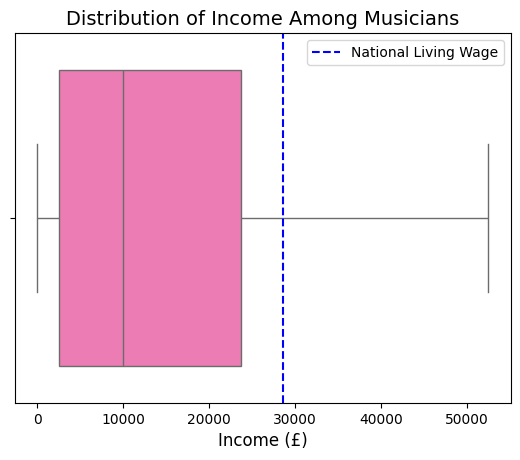

In [34]:
# Box plot as it effectively visulaises the spread, central tendency and potential outlier in the data. It also allowed for me to add
# a refernce line for the national living wage comparison. It is simple and can be interpretated easily to communicate to multiple audiences
sns.boxplot(data=mb, x='Income', color='#FF69B4')

# Title and axis labels
plt.title('Distribution of Income Among Musicians', fontsize=14, color='black')
plt.xlabel('Income (£)', fontsize=12, color='black')

# Reference line for the National Living Wage
national_living_wage = 28554.24  # Replace with the appropriate value if updated
plt.axvline(national_living_wage, color='blue', linestyle='--', label='National Living Wage')

# Legend
plt.legend()

# Show the plot
plt.show()

**Age**

The average ago of participants was 33 but the median being 27. This discrepancy suggests a skew towards younger musicians, potentially due to the survey's distribution on platforms like LinkedIn and Facebook, which are more commonly used by younger generations.

/tmp/ipykernel_622/3089293035.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=mb, x='Age', shade=True, color='#FF69B4', alpha=0.6)


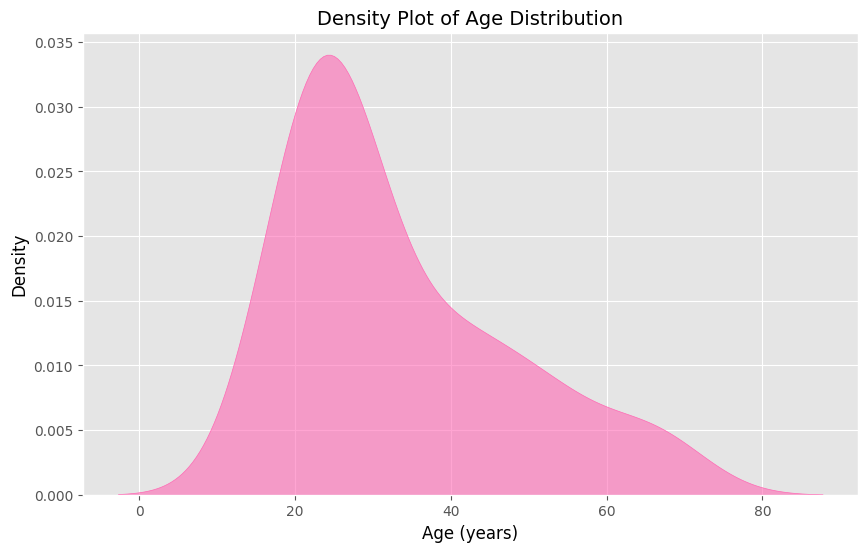

In [35]:
# A density plot because it provides a smooth and continuous visualisation of the data; Making it easier to identify patterns than a histogram
# this shows the relative frequences of ages, eventhough the data was collected in ranges, and therefore midpoints were used for the data
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Create a density plot for Age
sns.kdeplot(data=mb, x='Age', shade=True, color='#FF69B4', alpha=0.6)

# Add a title and axis labels
plt.title('Density Plot of Age Distribution', fontsize=14, color='black')
plt.xlabel('Age (years)', fontsize=12, color='black')
plt.ylabel('Density', fontsize=12, color='black')

# Show the plot
plt.show()

**Gender**
  
Most participants identified as male (mode = 0), with a mean gender value of 0.42 reflecting a gender imbalance in the sample. This discrepancy could potentially as help musicians (2024) state that 78.2% of musicians are men.

Help musicians (2024) Latest Musicians’ Census report highlights the gender inequity faced by women musicians. Available at:https://www.helpmusicians.org.uk/about-us/news/latest-musicians-census-report-highlights-the-gender-inequity-faced-by-women-musicians#:~:text=The%20music%20roles%20and%20genres%20defined%20by%20gender&text=In%20terms%20of%20roles%2C%2079,%E2%80%8Bmastering%20engineers%20are%20women.(Accessed: 19 December 2024).


Text(0.5, 1.0, 'Proportion of Gender')

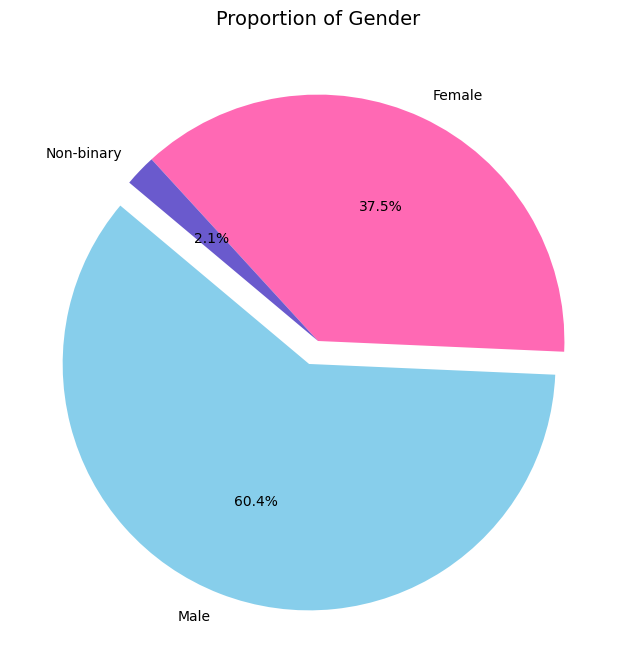

In [36]:
# A Pie chart as it effectively highlights proportional relationships within the categorical data. Simply shows the visual dominance 
# the male category. Using the explode effect for the male catogorie helped to emphasise its prevalence, while insuring the smaller categories
# remain undisturbed. Pie charts are also very intuitive and widely recogonised, making it suitable for presenting data to any audience.

# Plot the pie chart
Gender = mb['Gender'].value_counts()

# Define labels
labels = ['Male', 'Female', 'Non-binary']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    Gender,  
    labels=labels,  
    autopct='%1.1f%%',  
    startangle=140,  
    colors=['#87CEEB', '#FF69B4', '#6A5ACD'],  
    explode=(0.1, 0, 0)  
)

# Add title
plt.title('Proportion of Gender', fontsize=14, color='black')

# Show the plot

**New ensemble_freq**

Indicating that on average musicians perform with around 14 new ensembles per year, with the median and mode being 12. Suggesting that most musicians work with about one new ensemble per month. The slightly higher mean indicates some outliers who perform with more new ensembles, which could correlate with increased workloads and stress, particularly for those not in stable employment.

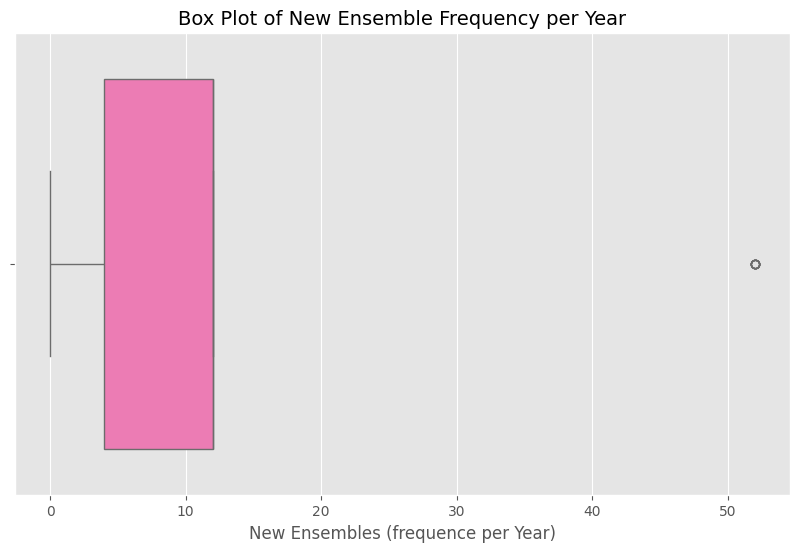

In [37]:
# A box plot was chosen to show a clear summary of the distributions spread along with the outlier. It shows the typical expiernece and 
# exceptional cases, ensuring a blanced analysis of central trends and the extreme.

# Box plot to highlight the spread of values, outliers and the overall distribution.
plt.figure(figsize=(10, 6))
sns.boxplot(x=mb['New_ensemble_freq'], color='#FF69B4')
plt.xlabel('New Ensembles (frequence per Year)', fontsize=12)
plt.title('Box Plot of New Ensemble Frequency per Year', fontsize=14)
plt.show()

**Say no to jobs**

Participants on average decline 5 jobs, with a medium of 5, suggesting that musicians occaisnally turn down jobs to prioritise their mental health and avoid burnout, along with a mode of 0 with indicate the majority rarely say no to opportunities.

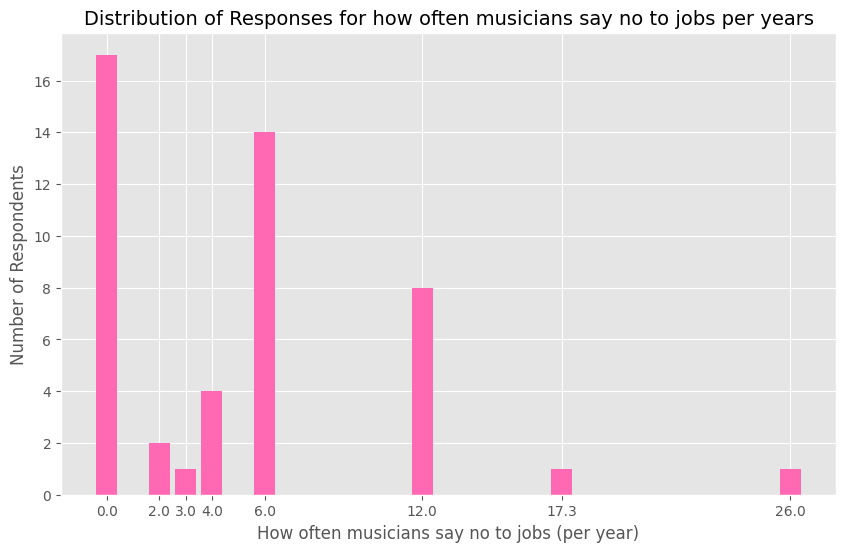

In [38]:
# The bar chart effectively displays the frequences of the responses, while highlighting the variability and outliers. 
# The responses are discrete and categorical, making a histogram unsuitable as it assume continuous data.

# Bar chart to demonstrate how often musicians decline jobs.
plt.figure(figsize=(10, 6))
plt.bar(mb['Say_No_To_Jobs'].value_counts().sort_index().index, 
        mb['Say_No_To_Jobs'].value_counts().sort_index().values, 
        color='#FF69B4')

# Adjust x-axis labels for proper spacing
plt.xticks(ticks=mb['Say_No_To_Jobs'].value_counts().sort_index().index, 
           labels=mb['Say_No_To_Jobs'].value_counts().sort_index().index, 
           fontsize=10)

# Add labels and title
plt.xlabel('How often musicians say no to jobs (per year)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.title('Distribution of Responses for how often musicians say no to jobs per years', fontsize=14)

plt.show()

**Career opportunities**
  
The average score for taking work to avoid missing out on career-defining opportunities is 14.49, highlighting a strong tendency among musicians to prioritize career advancement.


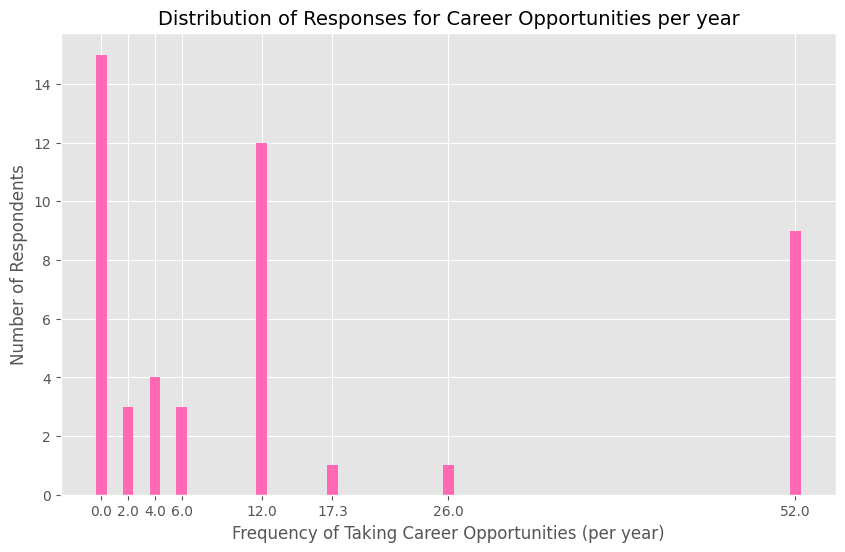

In [39]:
# The bar chart effectively displays the frequences of the responses, while highlighting the variability and outliers. 
# The responses are discrete and categorical, making a histogram unsuitable as it assume continuous data.

# Bar chart for "Career_Opp"
plt.figure(figsize=(10, 6))
plt.bar(mb['Career_Opp'].value_counts().sort_index().index, 
        mb['Career_Opp'].value_counts().sort_index().values, 
        color='#FF69B4')

# Adjust x-axis labels for proper spacing
plt.xticks(ticks=mb['Career_Opp'].value_counts().sort_index().index, 
           labels=mb['Career_Opp'].value_counts().sort_index().index, 
           fontsize=10)

# Add labels and title
plt.xlabel('Frequency of Taking Career Opportunities (per year)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.title('Distribution of Responses for Career Opportunities per year', fontsize=14)

plt.show()


**Perfectionist**
  
With 60% of participants identifying as perfectionists, this trait is prevalent in the sample, reflecting the high personal and professional standards of many musicians.


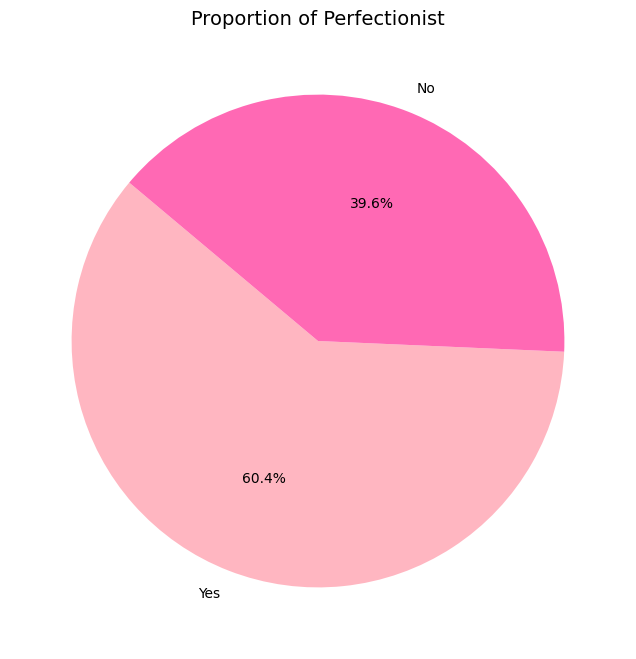

In [40]:
# A pie chart is a simple say to display the proportion of categorical responses (yes and no). It is clear and provides immedicial visual representaion.

# Pie chart for "Perfectionist"
plt.figure(figsize=(8, 8))
perfectionist_counts = mb['Perfectionist'].value_counts()

plt.pie(perfectionist_counts, 
        labels=['Yes', 'No'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#FFB6C1', '#FF69B4'])

# Add title
plt.title('Proportion of Perfectionist', fontsize=14, color='black')

# Show the plot
plt.show()


**Conservatoire**

58% of participants reported attending a conservatoire, suggesting that formal, specialized music education is common among professional musicians. The time at these insitution could impact musicians ability to say no.

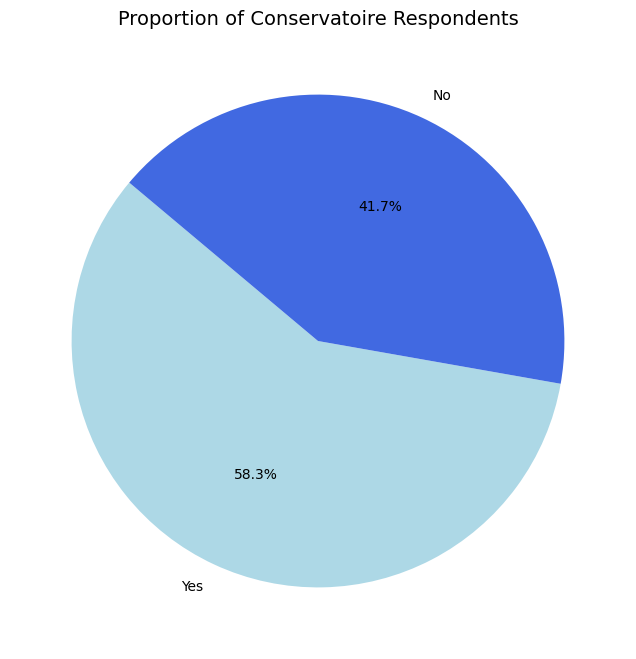

In [41]:
# A pie chart is a simple say to display the proportion of categorical responses (yes and no). It is clear and provides immedicial visual representaion.
# Pie chart for "Conservatoire"
plt.figure(figsize=(8, 8))
conservatoire_counts = mb['Conservatoire'].value_counts()

plt.pie(conservatoire_counts, 
        labels=['Yes', 'No'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#ADD8E6', '#4169E1'])

# Add title
plt.title('Proportion of Conservatoire Respondents', fontsize=14, color='black')

plt.show()


**Non conservatoire** 

Conversely, 48% of participants studied at non-conservatoire institutions, reflecting a diverse range of educational paths within the music industry.

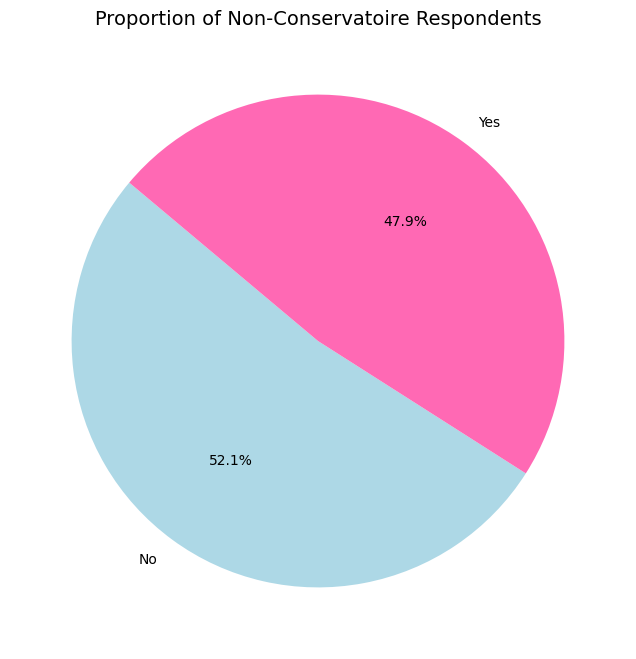

In [42]:
# A pie chart is a simple say to display the proportion of categorical responses (yes and no). It is clear and provides immedicial visual representaion.
# Pie chart for "Non_Conservatoire"
plt.figure(figsize=(8, 8))
non_conservatoire_counts = mb['Non_conservatoire'].value_counts()

plt.pie(non_conservatoire_counts, 
        labels=['No', 'Yes'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#ADD8E6', '#FF69B4'])

# Add title
plt.title('Proportion of Non-Conservatoire Respondents', fontsize=14, color='black')

plt.show()


# Analysis of non numerical data

**Work_type**

The distribution of work types among musicians reveals that freelance work is the most prevalent, potentially indicating income instability. In contrast, less frequent roles, such as touring musicians, may reflect limited access to higher-paying opportunities.

In [43]:
mb.Work_type.value_counts()

Work_type
freelance (multiple)     28
freelance (single)       15
music teacher             2
other                     1
permanent + freelance     1
touring musician          1
Name: count, dtype: int64

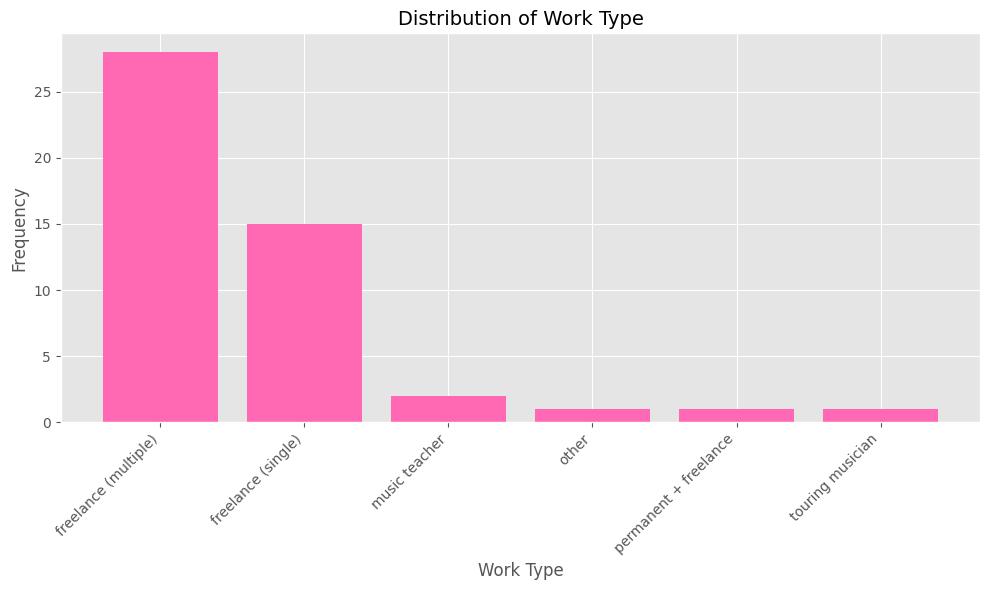

In [44]:
# Bar chart as it clearlty represents the frequences of each category which are distinct and non-numerical.
# The bar chart compares the different work types and highlights the dominance of freelance effectavily.

# Work Type Analysis
work_type_counts = mb['Work_type'].value_counts()

# Bar chart for Work Type
plt.figure(figsize=(10, 6))
plt.bar(work_type_counts.index, work_type_counts.values, color='#FF69B4')
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Work Type', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.tight_layout()
plt.show()


**Ensemble type**

Orchestral/chamber and musical theatre ensembles dominate the types of groups that professional musicians perform with. This suggests that these genres are highly sought after, likely due to their popularity and accessibility to audiences. The prominence of these ensemble types reflects the alignment of professional performance opportunities with audience demand and established traditions within the music industry.

In [45]:
mb.Ensemble_type.value_counts()

Ensemble_type
orchestral/chamber       17
musical theatre          16
contemporary ensemble     7
generalist                5
church music              1
soloist                   1
session work              1
Name: count, dtype: int64

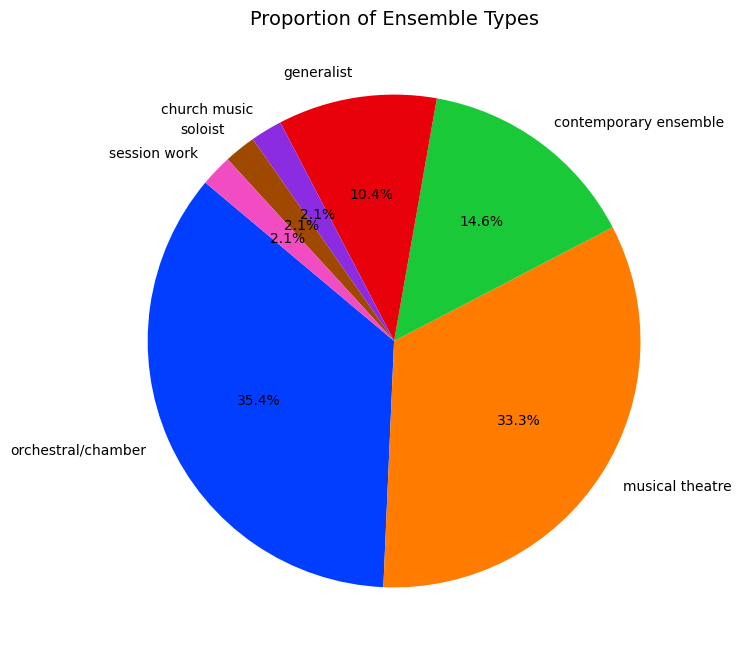

In [46]:
# The pie chart effectively represents the proportional distribution of categorical variables, showing how orchestral/chamber and 
# musicial theatre dominats, while also illustrating the smaller categories.
# A bar chart could also work, but as this was the previous figure I wanted to add some variation.

# Ensemble Type Analysis
ensemble_type_counts = mb['Ensemble_type'].value_counts()

# Pie chart for Ensemble Type
plt.figure(figsize=(8, 8))
plt.pie(
    ensemble_type_counts.values, 
    labels=ensemble_type_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("bright")
)
plt.title('Proportion of Ensemble Types', fontsize=14)
plt.show()


Experienced burnout


The majority of participants said that they have faced burnout some point in their careers, with only a small minority reporting they have not. This stark contract highlights the significant prevalence of burnout amoung professional musicians, underscoring the pressures and challenges inherent in the profession.

In [47]:
mb.Experienced_burnout.value_counts()

Experienced_burnout
1    42
0     6
Name: count, dtype: int64

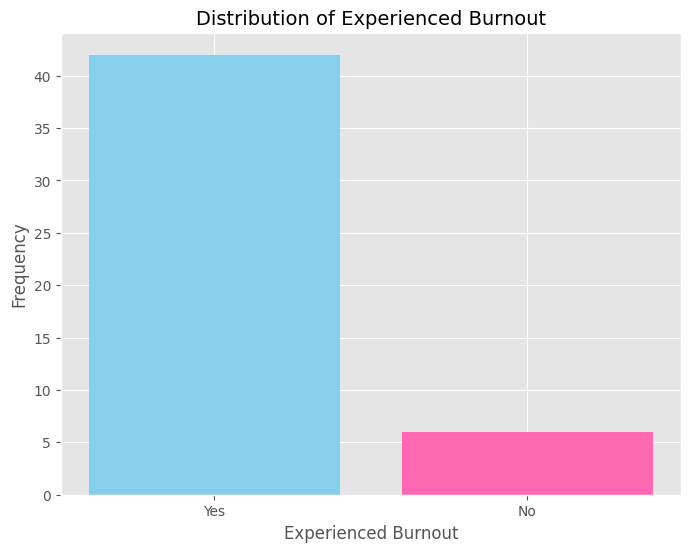

In [48]:
# The bar chart effectively displays the binary responses in a clear an consise manner
# The two bars on the chart make the figure very straughtfoward and avoids any unnecessary complexity.
# Experienced Burnout Analysis
burnout_counts = mb['Experienced_burnout'].value_counts()

# Bar chart for Experienced Burnout
plt.figure(figsize=(8, 6))
plt.bar(burnout_counts.index.map({0: 'No', 1: 'Yes'}), burnout_counts.values, color=['#87CEEB', '#FF69B4'])
plt.xlabel('Experienced Burnout', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Experienced Burnout', fontsize=14)
plt.show()


# Conclusion

This analysis highlights the significant challenges and characteristics of professional musicians based on data collected in May 2024. The findings reveal profound financial instability, with most musicians earning below the national living wage. This aligns with the broader issues identified in my dissertation, "Just Say No!: Musicians and Burnout," which explores how factors like workload and an inability to decline jobs exacerbate stress and burnout in this profession.

The study underscores the prevalence of freelance work and the dominance of orchestral and musical theatre ensembles, reflecting audience demand but also raising concerns about stable employment. Additionally, the high rate of burnout, reported by 86% of participants, highlights the mental and physical toll of this career, shaped by perfectionism and the drive to seize every opportunity.

However, this analysis is limited by a small and geographically narrow sample size, primarily representing UK-based musicians. Expanding the dataset to include a more diverse and larger group could deepen insights into these critical issues. Future research should also address cultural and systemic differences in the music industry, as well as effective interventions to promote sustainable careers and well-being for musicians.